## Import libraries

In [20]:
import pandas as pd  # For data manipulation
import numpy as np  # For statistical operations
from matplotlib import pyplot as plt  # For basic data visualizations

import warnings
warnings.filterwarnings("ignore")

In [21]:
df = pd.read_csv('data/death-rates-from-air-pollution.csv')
#df = df.dropna(axis=0)
df[df['Code'].isna()]['Entity'].unique()
df.head()

,Entity,Code,Year,"Air pollution (total) (deaths per 100,000)","Indoor air pollution (deaths per 100,000)","Outdoor particulate matter (deaths per 100,000)","Outdoor ozone pollution (deaths per 100,000)"
0,Afghanistan,AFG,1990,299.477309,250.362910,46.446589,5.616442
1,Afghanistan,AFG,1991,291.277967,242.575125,46.033841,5.603960
2,Afghanistan,AFG,1992,278.963056,232.043878,44.243766,5.611822
3,Afghanistan,AFG,1993,278.790815,231.648134,44.440148,5.655266
4,Afghanistan,AFG,1994,287.162923,238.837177,45.594328,5.718922


## Preprocessing

In [28]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
df = df.drop(["Indoor air pollution (deaths per 100,000)","Entity"],axis=1)
df["Code"] = l.fit_transform(df["Code"])
#df["Entity"] = l.fit_transform(df["Entity"])
df.head()

,Code,Year,"Air pollution (total) (deaths per 100,000)","Outdoor particulate matter (deaths per 100,000)","Outdoor ozone pollution (deaths per 100,000)"
0,0,1990,299.477309,46.446589,5.616442
1,0,1991,291.277967,46.033841,5.603960
2,0,1992,278.963056,44.243766,5.611822
3,0,1993,278.790815,44.440148,5.655266
4,0,1994,287.162923,45.594328,5.718922


## More visualization

In [29]:
pd.options.plotting.backend = "plotly"
temp_df = df.drop(["Year"],axis=1)
temp_df.plot()

In [30]:
fig = df.plot.scatter(y="Code", x='Outdoor ozone pollution (deaths per 100,000)')
fig.show()

In [31]:
#https://plotly.com/python/pandas-backend/

import plotly.graph_objects as go # or plotly.express as px

#fig = go.Figure() # or any Plotly Express function e.g. px.bar(...)

#fig = df.plot.scatter(y="Code", x='Outdoor ozone pollution (deaths per 100,000)') # More interactive scatter plots
fig = df.drop(["Year"],axis=1).plot.hist() #Does not follow normal dist


# fig.add_trace( ... )
# fig.update_layout( ... )

import dash
import dash_core_components as dcc
import dash_html_components as html

app = dash.Dash()
app.layout = html.Div([
    dcc.Graph(figure=fig)
])

app.run_server(debug=True, use_reloader=False)  # Turn off reloader if inside Jupyter

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


## Fitting model

<AxesSubplot: >

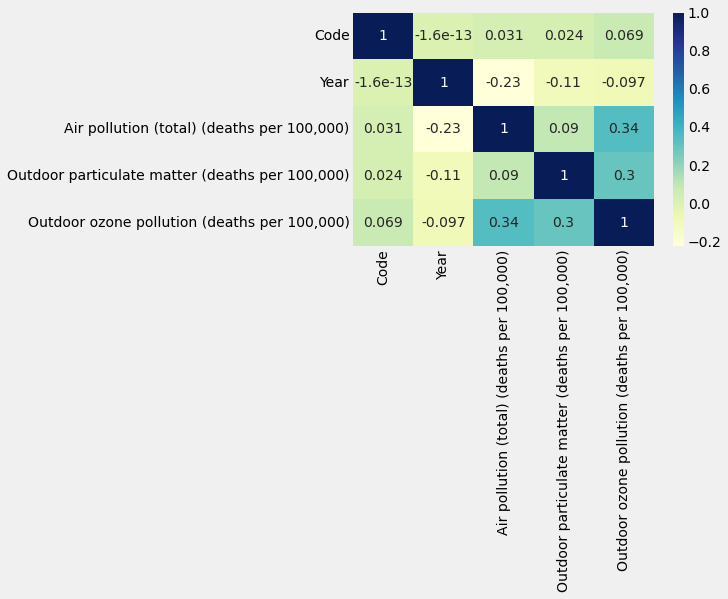

In [32]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True, cmap='YlGnBu')

In [33]:
from sklearn.model_selection import train_test_split
X = df[["Code","Year","Outdoor ozone pollution (deaths per 100,000)"]]
y = df["Outdoor particulate matter (deaths per 100,000)"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

## Train the model

In [34]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [35]:
predicted = model.predict(X_test)

In [36]:
print("Predicted values are : ",predicted[:5])
print("Predicted coefficients are : ",model.coef_)
print("The slope of the line is : ",model.intercept_)

Predicted values are :  [34.61192638 36.60456683 31.89299751 34.48116997 31.20302201]
Predicted coefficients are :  [-0.00218986 -0.17991907  1.17830058]
The slope of the line is :  391.8624183939416


## Metrics

In [37]:
from sklearn.metrics import mean_squared_error
total_error = mean_squared_error(y_test,predicted)

In [38]:
print("Total mean squared error is : ", total_error)

Total mean squared error is :  305.588862168591


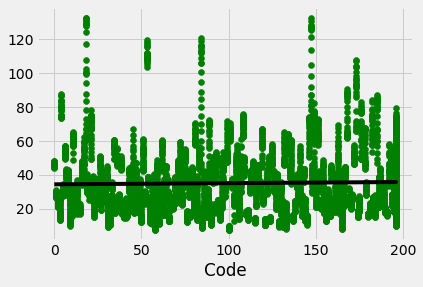

In [39]:
X = df["Code"].values[:,np.newaxis]
y = df["Outdoor particulate matter (deaths per 100,000)"].values

model2 = LinearRegression()
model2.fit(X, y)

plt.scatter(X, y,color='g')
plt.plot(X, model2.predict(X),color='k')
plt.xlabel("Code")
plt.show()